In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import env
import acquire
import prepare
from wordcloud import WordCloud
import nltk.sentiment
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-7e378cf14cb2>:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# 1. Spam Data

## a. Load the spam data set.

In [2]:
#acquire data from spam_db

from env import user, password, host

# def get_db_url(database, host=host, user=user, password=password):
#     return f'mysql+pymysql://{user}:{password}@{host}/{database}'


# url = get_db_url("spam_db")
# sql = "SELECT * FROM spam"

# df = pd.read_sql(sql, url, index_col="id")

raw = pd.read_csv("spam_clean - spam_clean.csv")

raw.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [3]:
import prepare
raw['cleaned']=raw.text.apply(prepare.basic_clean).apply(prepare.tokenize)\
.apply(prepare.remove_stopwords, extra_words=[], 
                                   exclude_words=[])
# df.head()

In [4]:
raw['stemmed'] = raw.cleaned.apply(prepare.stem)
# df.head()

In [5]:
raw['lemmatized']= raw.cleaned.apply(prepare.lemmatize)

In [6]:
raw.head()

,label,text,cleaned,stemmed,lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazy available bugis n great world la e buffet cine got amore wat,go jurong point crazi avail bugi n great world la e buffet cine got amor wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goes usf lives around though,nah dont think goe usf live around though,nah dont think go usf life around though


In [7]:
raw.label.value_counts(normalize = True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [8]:
lemmatized_df = raw.drop(columns=['text','cleaned','stemmed'])
lemmatized_df.head(1)

,label,lemmatized
0,ham,go jurong point crazy available bugis n great world la e buffet cine got amore wat


In [9]:
# def clean(text):
#     '''Simplified text cleaning function'''
#     text = text.lower()
#     text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#     return re.sub(r"[^a-z0-9\s]", '', text)

In [10]:
# combine all messages in single string by label

ham_words = (' '.join(raw[raw.label == 'ham'].lemmatized))
spam_words = (' '.join(raw[raw.label == 'spam'].lemmatized))
all_words = (' '.join(raw.lemmatized))

In [11]:
# ham_words

## b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

<AxesSubplot:>

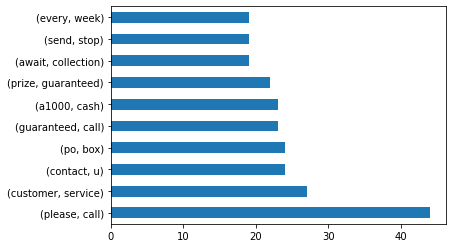

In [12]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()

In [13]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split()))
# ham_bigrams = nltk.ngrams(ham_words.split(), 2)
spam_bigrams.head(10),

(0    (free, entry)
 1    (entry, 2)   
 2    (2, wkly)    
 3    (wkly, comp) 
 4    (comp, win)  
 5    (win, fa)    
 6    (fa, cup)    
 7    (cup, final) 
 8    (final, tkts)
 9    (tkts, 21st) 
 dtype: object,)

In [14]:
# data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}

In [15]:
# len(data)

In [16]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [17]:
def make_bigrams_list(series):
    '''
    Function that converts a series of bigrams into a list
    '''
    bigrams_list = []
    for bigram in series:
        bigram = list(bigram)
        bigram = ' '.join(bigram)
        bigrams_list.append(bigram)
    return bigrams_list

In [18]:
# make_bigrams_list(spam_bigrams)

In [19]:
# this code was working earlier and helped me create the above function. 
# commenting out and moving forwar for now


# for bigram in spam_bigrams:
#     biggy = list(bigram)
#     biggy = ' '.join(biggy)
#     print(biggy)


#### Ok good work getting the VADER analysis on each bigram. Now, get it in a DF

In [20]:
# test = pd.DataFrame(pd.Series(pd.Series(nltk.bigrams(spam_words.split()))),columns=['bigram'])
# test.head()

big_spam_df = pd.DataFrame(pd.Series(make_bigrams_list(spam_bigrams)),columns=['bigram'])
big_spam_df.head()

,bigram
0,free entry
1,entry 2
2,2 wkly
3,wkly comp
4,comp win


In [21]:

big_spam_df.shape

(12504, 1)

In [22]:
big_spam_df['sentiment'] = big_spam_df.bigram.apply(lambda doc: sia.polarity_scores(doc)['compound'])

big_spam_df['label'] = 'spam'
big_spam_df.head()


,bigram,sentiment,label
0,free entry,0.5106,spam
1,entry 2,0.0000,spam
2,2 wkly,0.0000,spam
3,wkly comp,0.0000,spam
4,comp win,0.5859,spam


### Great work, got the VADER sentiment analysis for each bigram

In [23]:
big_spam_df.sort_values(by='sentiment')

,bigram,sentiment,label
183,jersey devil,-0.6597,spam
184,devil detroit,-0.6597,spam
9811,potential abuse,-0.6369,spam
11216,tsunami disaster,-0.6249,spam
5706,bitch go,-0.5859,spam
...,...,...,...
5082,love satisfy,0.8020,spam
7670,fun great,0.8126,spam
4259,win winner,0.8225,spam
10579,win winner,0.8225,spam


In [24]:
big_spam_df[big_spam_df.sentiment < 0].sort_values(by='sentiment').head(10)

,bigram,sentiment,label
183,jersey devil,-0.6597,spam
184,devil detroit,-0.6597,spam
9811,potential abuse,-0.6369,spam
11216,tsunami disaster,-0.6249,spam
5706,bitch go,-0.5859,spam
5013,po box,-0.5574,spam
5113,uk po,-0.5574,spam
5114,po box,-0.5574,spam
5164,ntt po,-0.5574,spam
5165,po box,-0.5574,spam


In [25]:
big_spam_df[big_spam_df.sentiment > 0].sort_values(by='sentiment').tail(10)

,bigram,sentiment,label
8278,win free,0.7964,spam
6575,sunshine congratulation,0.7964,spam
3694,win free,0.7964,spam
4093,win vip,0.7964,spam
4178,win free,0.7964,spam
5082,love satisfy,0.8020,spam
7670,fun great,0.8126,spam
10579,win winner,0.8225,spam
4259,win winner,0.8225,spam
10428,win super,0.8271,spam


In [26]:
big_spam_df.bigram.value_counts()

please call          44
customer service     27
po box               24
contact u            24
a1000 cash           23
                     ..
racal libertine      1 
ok 80488             1 
enter unsubscribe    1 
b4 10th              1 
review keep          1 
Name: bigram, Length: 7036, dtype: int64

### my dataframe is messed up, in that it is composed of the value_counts on the bigrams, not handy for further explo.  fixing now...

### ALL FIXED

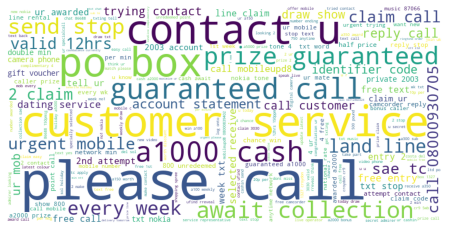

In [27]:
# value_counts bc we want the most commonly occuring bigrams at the forefront
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split())).value_counts()


data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

- that’s a dictionary comprehension - kinda like a list comprehension but w/ dictionary keys and values
- the convention is `k` for the key name and `v` for the value that that particular key points to

In [28]:
# this would be to have a look at the ham bigrams
# pd.Series(nltk.bigrams(ham_words.split())).value_counts()#.head(10).plot.barh()

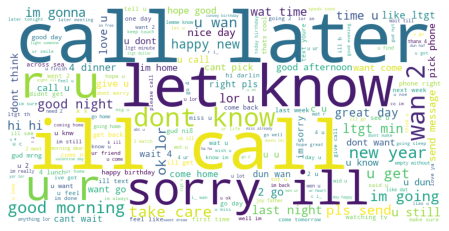

In [29]:
ham_bigrams = pd.Series(nltk.bigrams(ham_words.split())).value_counts()
# ham_bigrams = nltk.ngrams(ham_words.split(), 2)
# ham_bigrams.head()
data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

<AxesSubplot:>

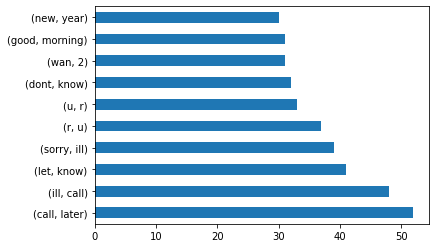

In [30]:
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()

In [31]:
ham_bigrams = pd.Series(nltk.bigrams(ham_words.split()))
# ham_bigrams = nltk.ngrams(ham_words.split(), 2)
ham_bigrams.head(),

(0    (go, jurong)      
 1    (jurong, point)   
 2    (point, crazy)    
 3    (crazy, available)
 4    (available, bugis)
 dtype: object,)

In [32]:
# test = pd.DataFrame(pd.Series(pd.Series(nltk.bigrams(spam_words.split()))),columns=['bigram'])
# test.head()

big_ham_df = pd.DataFrame(pd.Series(make_bigrams_list(ham_bigrams)),columns=['bigram'])
big_ham_df.head()


,bigram
0,go jurong
1,jurong point
2,point crazy
3,crazy available
4,available bugis


In [33]:
big_ham_df.shape

(39825, 1)

In [34]:
big_ham_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39825 entries, 0 to 39824
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bigram  39825 non-null  object
dtypes: object(1)
memory usage: 311.3+ KB


In [35]:
big_ham_df['sentiment'] = big_ham_df.bigram.apply(lambda doc: sia.polarity_scores(doc)['compound'])

big_ham_df['label'] = 'ham'
big_ham_df.head()


,bigram,sentiment,label
0,go jurong,0.00,ham
1,jurong point,0.00,ham
2,point crazy,-0.34,ham
3,crazy available,-0.34,ham
4,available bugis,0.00,ham


In [36]:
big_ham_df.sort_values(by='sentiment')

,bigram,sentiment,label
30607,motherfucker hurt,-0.8402,ham
23519,arrested murderer,-0.8271,ham
17302,arrested murderer,-0.8271,ham
19249,arrested murderer,-0.8271,ham
440,pain killing,-0.8271,ham
...,...,...,...
29353,love loving,0.8442,ham
14353,love lmao,0.8442,ham
35915,love great,0.8519,ham
25625,love great,0.8519,ham


In [37]:
big_ham_df.bigram.value_counts()

call later        52
ill call          48
let know          41
sorry ill         39
r u               37
                  ..
welcome caught    1 
fuck good         1 
full might        1 
make im           1 
shop parking      1 
Name: bigram, Length: 31377, dtype: int64

## c. Is there any overlap in the bigrams for the spam data and the ham data?

In [38]:
bigram_df = big_spam_df.merge(big_ham_df, how='outer')
bigram_df.head()

,bigram,sentiment,label
0,free entry,0.5106,spam
1,free entry,0.5106,spam
2,free entry,0.5106,spam
3,free entry,0.5106,spam
4,free entry,0.5106,spam


In [39]:
bigram_df.shape

(52329, 3)

In [40]:
bigram_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52329 entries, 0 to 52328
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bigram     52329 non-null  object 
 1   sentiment  52329 non-null  float64
 2   label      52329 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.6+ MB


In [41]:
bigram_df.describe()

,sentiment
count,52329.000000
mean,0.059386
std,0.220289
min,-0.840200
25%,0.000000
50%,0.000000
75%,0.000000
max,0.855500


- the average sentiment is just above neutral, and roughly equal max/min

In [42]:
bigram_df.head(2)

,bigram,sentiment,label
0,free entry,0.5106,spam
1,free entry,0.5106,spam


In [43]:
# bigram_df[bigram_df[bigram_df.label == 'spam'].bigram & bigram_df[bigram_df.label == 'ham'].bigram]

In [44]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split()))


ham_bigram_freq = pd.Series(make_bigrams_list(ham_bigrams)).value_counts()
spam_bigram_freq = pd.Series(make_bigrams_list(spam_bigrams)).value_counts()
# all_freq = pd.Series(all_words.split()).value_counts()

In [45]:
spam_bigram_freq

please call          44
customer service     27
po box               24
contact u            24
a1000 cash           23
                     ..
racal libertine      1 
ok 80488             1 
enter unsubscribe    1 
b4 10th              1 
review keep          1 
Length: 7036, dtype: int64

In [46]:
bigram_counts = pd.concat([ham_bigram_freq, spam_bigram_freq], axis=1).fillna(0).astype(int)
bigram_counts.columns = ['ham_bigram', 'spam_bigram']
bigram_counts.head()

,ham_bigram,spam_bigram
call later,52,0
ill call,48,0
let know,41,0
sorry ill,39,0
r u,37,3


In [47]:
bigram_counts[bigram_counts.ham_bigram == bigram_counts.spam_bigram].head(20)

,ham_bigram,spam_bigram
u like,4,4
tonight want,2,2
2 take,2,2
send u,2,2
nothing u,1,1
would love,1,1
movie collect,1,1
today ur,1,1
u fancy,1,1
left message,1,1


## d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

<AxesSubplot:>

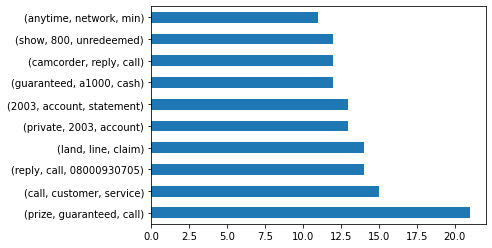

In [48]:
pd.Series(nltk.trigrams(spam_words.split())).value_counts().head(10).plot.barh()

In [49]:
spam_trigrams = pd.Series(nltk.trigrams(spam_words.split()))
# ham_bigrams = nltk.ngrams(ham_words.split(), 2)
spam_trigrams.head(10),

(0    (free, entry, 2)   
 1    (entry, 2, wkly)   
 2    (2, wkly, comp)    
 3    (wkly, comp, win)  
 4    (comp, win, fa)    
 5    (win, fa, cup)     
 6    (fa, cup, final)   
 7    (cup, final, tkts) 
 8    (final, tkts, 21st)
 9    (tkts, 21st, may)  
 dtype: object,)

In [50]:
ham_trigrams = pd.Series(nltk.trigrams(ham_words.split()))
ham_trigrams.head(10)

0    (go, jurong, point)      
1    (jurong, point, crazy)   
2    (point, crazy, available)
3    (crazy, available, bugis)
4    (available, bugis, n)    
5    (bugis, n, great)        
6    (n, great, world)        
7    (great, world, la)       
8    (world, la, e)           
9    (la, e, buffet)          
dtype: object

In [51]:
def make_trigrams_list(series):
    trigrams_list = []
    for trigram in series:
        trigram = list(trigram)
        trigram = ' '.join(trigram)
        trigrams_list.append(trigram)
    return trigrams_list

In [52]:
# make_trigrams_list(spam_trigrams)

In [53]:
trig_spam_df = pd.DataFrame(pd.Series(make_trigrams_list(spam_trigrams)),columns=['trigram'])
trig_spam_df['sentiment'] = trig_spam_df.trigram.apply(lambda doc: sia.polarity_scores(doc)['compound'])

trig_spam_df['label'] = 'spam'

trig_spam_df.head()

,trigram,sentiment,label
0,free entry 2,0.5106,spam
1,entry 2 wkly,0.0000,spam
2,2 wkly comp,0.0000,spam
3,wkly comp win,0.5859,spam
4,comp win fa,0.5859,spam


In [54]:
trig_spam_df.sort_values(by='sentiment')

,trigram,sentiment,label
182,new jersey devil,-0.6597,spam
183,jersey devil detroit,-0.6597,spam
184,devil detroit red,-0.6597,spam
9810,see potential abuse,-0.6369,spam
11215,asian tsunami disaster,-0.6249,spam
...,...,...,...
5495,congratulation thanks good,0.8658,spam
6576,congratulation thanks good,0.8658,spam
7433,congratulation thanks good,0.8658,spam
7750,free save free,0.8689,spam


In [55]:
trig_spam_df.trigram.value_counts()

prize guaranteed call              21
call customer service              15
land line claim                    14
reply call 08000930705             14
private 2003 account               13
                                   ..
challenge important information    1 
rate app cd                        1 
b snappy happy                     1 
3750 pound accident                1 
claim code 4041                    1 
Name: trigram, Length: 8327, dtype: int64

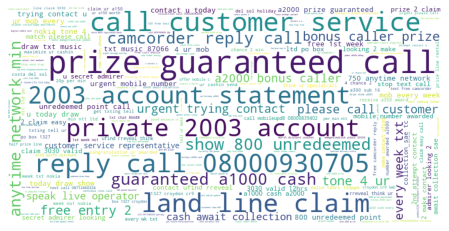

In [56]:
# value_counts bc we want the most commonly occuring bigrams at the forefront
spam_trigrams = pd.Series(nltk.trigrams(spam_words.split())).value_counts()


data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

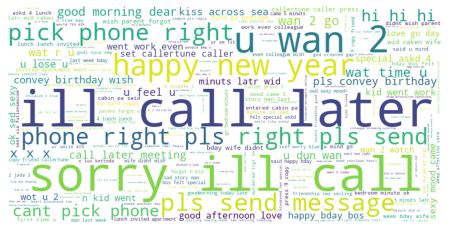

In [57]:
# value_counts bc we want the most commonly occuring bigrams at the forefront
ham_trigrams = pd.Series(nltk.trigrams(ham_words.split())).value_counts()


data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [58]:
ham_trigrams = pd.Series(nltk.trigrams(ham_words.split()))

spam_trigrams = pd.Series(nltk.trigrams(spam_words.split()))



In [59]:


trig_ham_df = pd.DataFrame(pd.Series(make_trigrams_list(ham_trigrams)),columns=['trigram'])
trig_ham_df['sentiment'] = trig_ham_df.trigram.apply(lambda doc: sia.polarity_scores(doc)['compound'])

trig_ham_df['label'] = 'spam'

trig_ham_df.head()

,trigram,sentiment,label
0,go jurong point,0.00,spam
1,jurong point crazy,-0.34,spam
2,point crazy available,-0.34,spam
3,crazy available bugis,-0.34,spam
4,available bugis n,0.00,spam


In [60]:
trig_ham_df.sort_values(by='sentiment')

,trigram,sentiment,label
30606,drunk motherfucker hurt,-0.8860,spam
30607,motherfucker hurt tease,-0.8834,spam
2168,enemy say hell,-0.8442,spam
23702,cancer throat hurt,-0.8316,spam
23519,arrested murderer immediately,-0.8271,spam
...,...,...,...
27104,adoring kiss love,0.8910,spam
29353,love loving kiss,0.8979,spam
24603,joy happiness gr8,0.9022,spam
26293,sweetheart darling sexy,0.9100,spam


In [61]:
trig_ham_df.trigram.value_counts()

ill call later         42
sorry ill call         38
u wan 2                21
happy new year         19
pls send message       13
                       ..
enjoy r u              1 
washob nobbing last    1 
pete ive bin           1 
hey sorry didntgive    1 
sr model pls           1 
Name: trigram, Length: 36644, dtype: int64

In [62]:
ham_trigram_freq = pd.Series(make_trigrams_list(ham_trigrams)).value_counts()
spam_trigram_freq = pd.Series(make_trigrams_list(spam_trigrams)).value_counts()

In [63]:
trigram_counts = pd.concat([ham_trigram_freq, spam_trigram_freq], axis=1).fillna(0).astype(int)
trigram_counts.columns = ['ham_trigram', 'spam_trigram']
trigram_counts.head()

,ham_trigram,spam_trigram
ill call later,42,0
sorry ill call,38,0
u wan 2,21,0
happy new year,19,0
pls send message,13,0


In [64]:
trigram_counts[trigram_counts.ham_trigram == trigram_counts.spam_trigram].head(20)

,ham_trigram,spam_trigram
2 c u,2,2
u im home,1,1
r u im,1,1
number im glad,1,1
u wanna cum,1,1
new year eve,1,1
called left message,1,1


# Explore the blog articles using the techniques discussed in the exploration lesson.

### Acquire and Prepare

In [87]:
def further_prep(df, col):
    df['sentences'] = df[col].apply(lambda row: row.splitlines())
    df['words'] = df.sentences.apply(lambda row: [nltk.word_tokenize(i) for i in row])
    df['bigrams'] = df.words.apply(lambda row: [list(nltk.bigrams(i)) for i in row])
    df['trigrams'] = df.words.apply(lambda row: [list(nltk.trigrams(i)) for i in row])
    df['word_count'] = df.lemmatized.apply(str.split).apply(len)
    df['overall_sentiment']= df.lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])
    return df


In [88]:
blogs_df =acquire.get_blog_articles(cached=False)
blogs_df =prepare.prep_article_data(blogs_df, 'article_content', extra_words=[], exclude_words=['no'])
blogs_df = blogs_df.drop(columns=['article_content', 'clean','stemmed'])
blogs_df = further_prep(blogs_df,'lemmatized')

blogs_df.head(2)


,title,date_published,lemmatized,sentences,words,bigrams,trigrams,word_count,overall_sentiment
0,Codeup Start Dates for March 2022,"Jan 26, 2022",approach end january wanted look forward next start date current program full stack web development 3722 full stack web development first program built also popular youve asked listened next web development cohort start 372022 entirely virtual seat go fast one indemand job country software web development tech career newest job u 15 million developer job 250000 remain open high growth rate 13 data science 32222 first new data science class 2022 start monday 3222022 downtown campus vogue building consider pivoting career data science 1 job america 20162020 glassdoor 650 increase data science position since 2012 nearly 12 million new job 2019 2029 31 tenyear growth rate supply data scientist remains painfully low compared outrageous demand help close gap launching fulfilling secure highpaying career one best country employer scrambling find talent due lack qualified applicant help fill gap futureproofing skillset flexibility security salary youve always wanted career ready launch career tech apply today admission team save seat get name list application found want experience codeup early join one workshop get intro specific coding language learn financing option maybe even code resume event located cant wait help launch career tech,[approach end january wanted look forward next start date current program full stack web development 3722 full stack web development first program built also popular youve asked listened next web development cohort start 372022 entirely virtual seat go fast one indemand job country software web development tech career newest job u 15 million developer job 250000 remain open high growth rate 13 data science 32222 first new data science class 2022 start monday 3222022 downtown campus vogue building consider pivoting career data science 1 job america 20162020 glassdoor 650 increase data science position since 2012 nearly 12 million new job 2019 2029 31 tenyear growth rate supply data scientist remains painfully low compared outrageous demand help close gap launching fulfilling secure highpaying career one best country employer scrambling find talent due lack qualified applicant help fill gap futureproofing skillset flexibility security salary youve always wanted career ready launch career tech apply today admission team save seat get name list application found want experience codeup early join one workshop get intro specific coding language learn financing option maybe even code resume event located cant wait help launch career tech],"[[approach, end, january, wanted, look, forward, next, start, date, current, program, full, stack, web, development, 3722, full, stack, web, development, first, program, built, also, popular, youve, asked, listened, next, web, development, cohort, start, 372022, entirely, virtual, seat, go, fast, one, indemand, job, country, software, web, development, tech, career, newest, job, u, 15, million, developer, job, 250000, remain, open, high, growth, rate, 13, data, science, 32222, first, new, data, science, class, 2022, start, monday, 3222022, downtown, campus, vogue, building, consider, pivoting, career, data, science, 1, job, america, 20162020, glassdoor, 650, increase, data, science, position, since, 2012, nearly, 12, million, new, job, ...]]","[[(approach, end), (end, january), (january, wanted), (wanted, look), (look, forward), (forward, next), (next, start), (start, date), (date, current), (current, program), (program, full), (full, stack), (stack, web), (web, development), (development, 3722), (3722, full), (full, stack), (stack, web), (web, development), (development, first), (first, program), (program, built), (built, also), (also, popular), (popular, youve), (youve, asked), (asked, listened), (listened, next), (next, web), (web, development), (development, cohort), (cohort, start), (start, 372022), (372022, entirely), (enti

In [117]:
# blog_bigrams = pd.Series(nltk.bigrams(blogs_df.bigrams.split()))

# blog_bigrams

# blogs_bbigrams_test = blogs_df.bigrams[0]

# # bigrams_test_df = pd.DataFrame(bigrams_test).T


### putting all this prep to bed for now

In [68]:
# blogs_df['words'] = [lambda: convert(blogs_df.lemmatized.tolist())]
# blogs_df.head()

In [69]:
# blogs_df[“tokenized_words”] = blogs_df.apply(lambda row: [nltk.word_tokenize(i) for i in row])
# blogs_df.head(1)


In [70]:
# blogs_df['sentences'] = blogs_df.lemmatized.apply(lambda row: row.splitlines())
# # def make_list(df,column):
# #     return df[column].apply(lambda row: [nltk.word_tokenize(i) for i in row])

In [71]:
# blogs_df.lemmatized.apply(lambda row: [nltk.word_tokenize(i) for i in row])

In [72]:
# blogs_df['words'] = blogs_df.sentences.apply(lambda row: [nltk.word_tokenize(i) for i in row])
# blogs_df.head()
# # blogs_df['words'] = blogs_df.apply(lambda row: [nltk.word_tokenize(i) for i in row])

In [73]:
# blogs_df = blogs_df.drop(columns=['sentences'])
# blogs_df.head(2)

In [74]:
# pd.Series(nltk.bigrams(make_bigrams_list(test2.sentences)))


In [75]:
# # make_bigrams_list(test2.sentences)
# test2['bigrams'] = test2.words.apply(lambda row: [list(nltk.bigrams(i)) for i in row])
# test2.head()

In [76]:
# test2['trigrams'] = test2.words.apply(lambda row: [list(nltk.trigrams(i)) for i in row])
# test2.head()

### Explore

# Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [118]:
def further_news_prep(df, col):
    df['sentences'] = df[col].apply(lambda row: row.splitlines())
    df['words'] = df.sentences.apply(lambda row: [nltk.word_tokenize(i) for i in row])
    df['bigrams'] = df.words.apply(lambda row: [list(nltk.bigrams(i)) for i in row])
    df['trigrams'] = df.words.apply(lambda row: [list(nltk.trigrams(i)) for i in row])
    df['word_count'] = df.lemmatized.apply(str.split).apply(len)
    df['overall_sentiment']= df.lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])
    return df


In [119]:
news_df =acquire.get_news_articles(cached=True)
news_df =prepare.prep_article_data(news_df, 'content', extra_words=[], exclude_words=['no'])
news_df = news_df.drop(columns=['content', 'clean','stemmed'])
news_df = further_prep(news_df,'lemmatized')

news_df.head(2)

,section,title,author,date_published,lemmatized,sentences,words,bigrams,trigrams,word_count,overall_sentiment
0,business,Drop in Meta's market value more than the total value of India's largest firm: Kotak,Arshiya Chopra,"04 Feb 2022,Friday",facebook parent meta lost 251 billion market value suffering biggest wipeout u market history kotak mahindra bank ceo uday kotak said total value india largest company highlight fragility fickleness time welcome never normal world added,[facebook parent meta lost 251 billion market value suffering biggest wipeout u market history kotak mahindra bank ceo uday kotak said total value india largest company highlight fragility fickleness time welcome never normal world added],"[[facebook, parent, meta, lost, 251, billion, market, value, suffering, biggest, wipeout, u, market, history, kotak, mahindra, bank, ceo, uday, kotak, said, total, value, india, largest, company, highlight, fragility, fickleness, time, welcome, never, normal, world, added]]","[[(facebook, parent), (parent, meta), (meta, lost), (lost, 251), (251, billion), (billion, market), (market, value), (value, suffering), (suffering, biggest), (biggest, wipeout), (wipeout, u), (u, market), (market, history), (history, kotak), (kotak, mahindra), (mahindra, bank), (bank, ceo), (ceo, uday), (uday, kotak), (kotak, said), (said, total), (total, value), (value, india), (india, largest), (largest, company), (company, highlight), (highlight, fragility), (fragility, fickleness), (fickleness, time), (time, welcome), (welcome, never), (never, normal), (normal, world), (world, added)]]","[[(facebook, parent, meta), (parent, meta, lost), (meta, lost, 251), (lost, 251, billion), (251, billion, market), (billion, market, value), (market, value, suffering), (value, suffering, biggest), (suffering, biggest, wipeout), (biggest, wipeout, u), (wipeout, u, market), (u, market, history), (market, history, kotak), (history, kotak, mahindra), (kotak, mahindra, bank), (mahindra, bank, ceo), (bank, ceo, uday), (ceo, uday, kotak), (uday, kotak, said), (kotak, said, total), (said, total, value), (total, value, india), (value, india, largest), (india, largest, company), (largest, company, highlight), (company, highlight, fragility), (highlight, fragility, fickleness), (fragility, fickleness, time), (fickleness, time, welcome), (time, welcome, never), (welcome, never, normal), (never, normal, world), (normal, world, added)]]",35,0.5859
1,business,Facebook's user growth in India slowed due to data price rise: Meta CFO,Sakshita Khosla,"04 Feb 2022,Friday",facebooks user growth india wa hit due hike prepaid data price fourth quarter 2021 meta cfo david wehner ha said came social medium giant recorded drop daily active user daus first time 18year history wehner also blamed competitive service dau drop,[facebooks user growth india wa hit due hike prepaid data price fourth quarter 2021 meta cfo david wehner ha said came social medium giant recorded drop daily active user daus first time 18year history wehner also blamed competitive service dau drop],"[[facebooks, user, growth, india, wa, hit, due, hike, prepaid, data, price, fourth, quarter, 2021, meta, cfo, david, wehner, ha, said, came, social, medium, giant, recorded, drop, daily, active, user, daus, first, time, 18year, history, wehner, also, blamed, competitive, service, dau, drop]]","[[(facebooks, user), (user, growth), (growth, india), (india, wa), (wa, hit), (hit, due), (due, hike), (hike, prepaid), (prepaid, data), (data, price), (price, fourth), (fourth, quarter), (quarter, 2021), (2021, meta), (meta, cfo), (cfo, david), (david, wehner), (wehner, ha), (ha, said), (said, came), (came, social), (social, medium), (medium, giant), (giant, recorded), (recorded, drop), (drop, daily), (daily, active), (active, user), (user, daus), (daus, first), (first, time), (time, 18year), (18year, history), (history, wehner), (wehner, also), (also, blamed), (blamed, competitive), (competitive, service), (service, dau), (dau, dro